<a href="https://colab.research.google.com/github/Umar-ch01/Performing-EDA-on-datasets/blob/main/Instagram%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import files
uploaded = files.upload()


Saving Preprocessed_Instagram_Dataset.csv to Preprocessed_Instagram_Dataset.csv


In [25]:
import pandas as pd

df = pd.read_csv('/content/Preprocessed_Instagram_Dataset.csv')
df.head()


,Followers,Following,Following/Followers,Posts,Posts/Followers,Bio,Profile Picture,External Link,Mutual Friends,Threads,Labels
0,2,2757,1378.5,0,0,N,N,N,0,N,Bot
1,2,505,252.5,0,0,N,Yes,N,0,N,Scam
2,6786,1782,0.262599469,1589,6051.040404,yes,N,Yes,10,N,Real
3,21,1281,61,0,0,N,Yes,N,0,N,Bot
4,585,1682,2.875213675,2663,926.1920333,yes,N,N,12,Yes,Real


In [26]:
# Check data types and non-null values
print(df.info())

# Summary statistics
print(df.describe())

# Check for missing values in each column
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Followers            15000 non-null  int64 
 1   Following            15000 non-null  int64 
 2   Following/Followers  15000 non-null  object
 3   Posts                15000 non-null  int64 
 4   Posts/Followers      15000 non-null  object
 5   Bio                  15000 non-null  object
 6   Profile Picture      15000 non-null  object
 7   External Link        15000 non-null  object
 8   Mutual Friends       15000 non-null  int64 
 9   Threads              15000 non-null  object
 10  Labels               15000 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.3+ MB
None
           Followers     Following         Posts  Mutual Friends
count   15000.000000  15000.000000  15000.000000    15000.000000
mean    23397.378933   1385.350000    427.830200        3.011733
std 

In [22]:
print(df.columns)


Index(['Followers', 'Following', 'Following/Followers', 'Posts',
       'Posts/Followers', 'Bio', 'Profile Picture', 'External Link',
       'Mutual Friends', 'Threads', 'Labels'],
      dtype='object')


In [27]:
# Identify column types
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

print("✅ Numeric Columns:", num_cols)
print("✅ Categorical Columns:", cat_cols)


✅ Numeric Columns: ['Followers', 'Following', 'Posts', 'Mutual Friends']
✅ Categorical Columns: ['Following/Followers', 'Posts/Followers', 'Bio', 'Profile Picture', 'External Link', 'Threads', 'Labels']


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


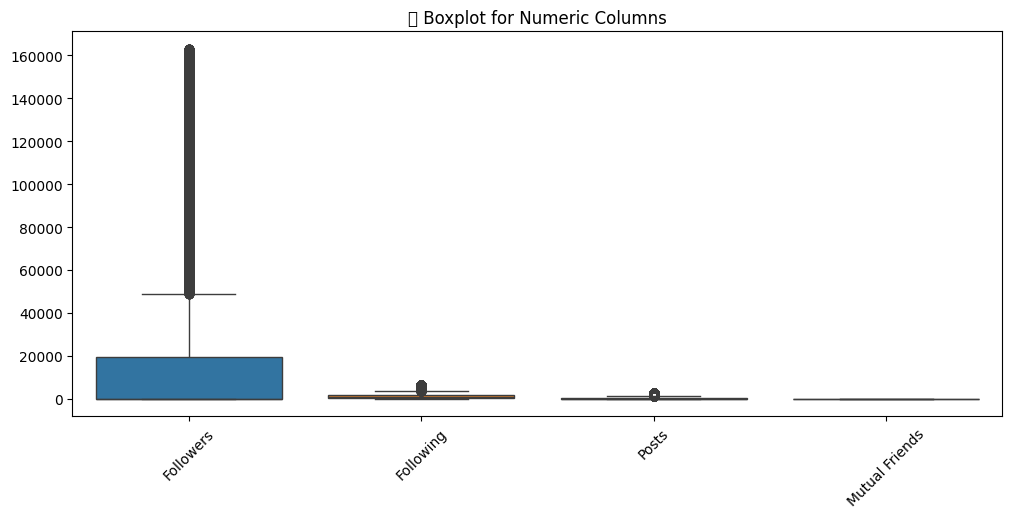

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.boxplot(data=df[num_cols])
plt.title("📊 Boxplot for Numeric Columns")
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


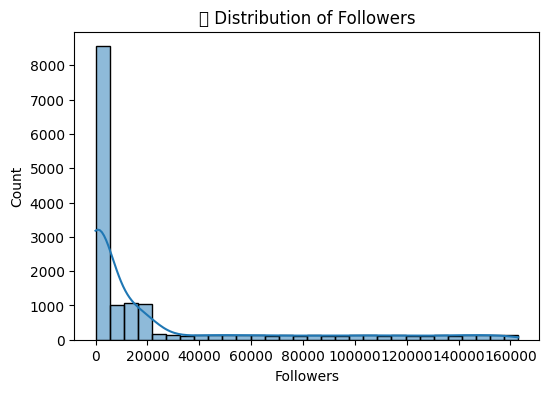

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


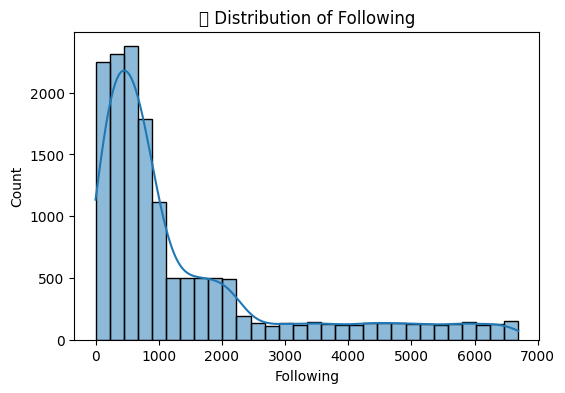

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


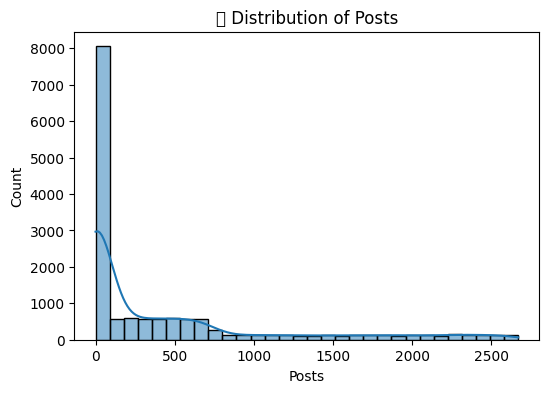

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


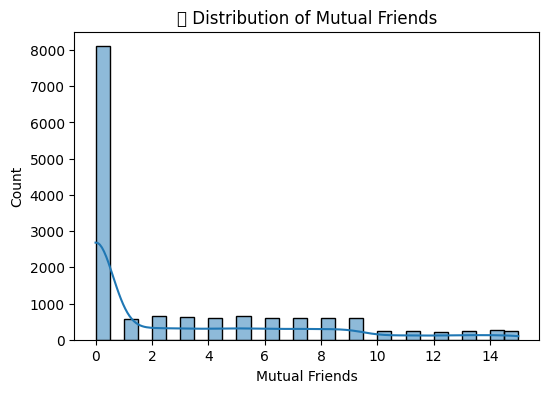

In [29]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"📈 Distribution of {col}")
    plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


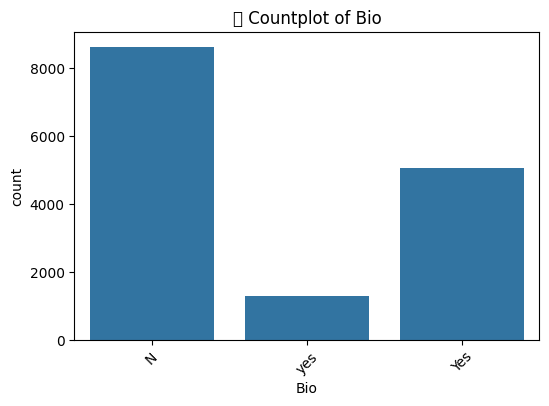

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


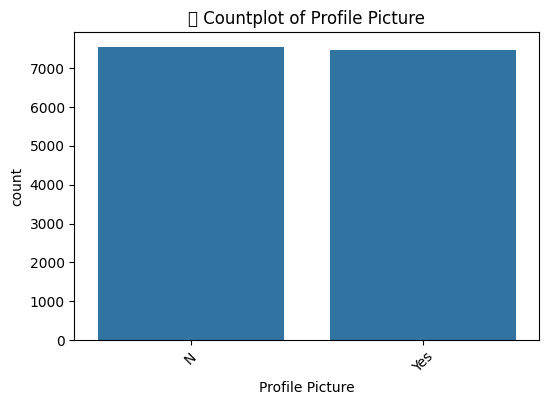

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


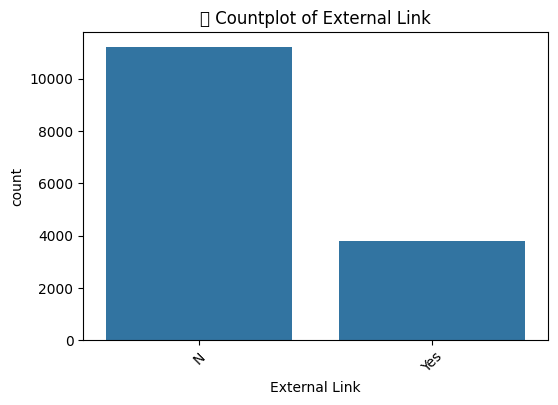

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


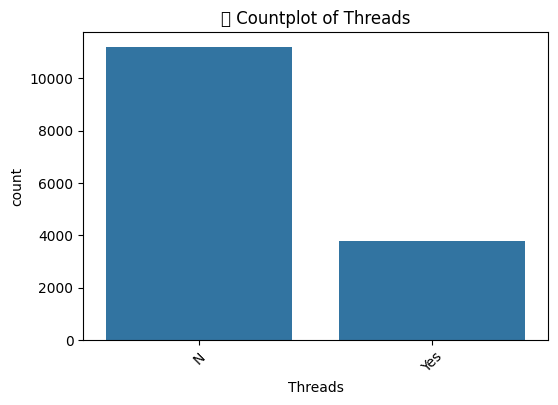

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


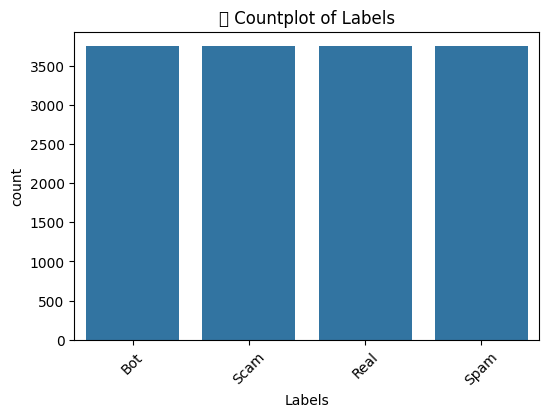

In [30]:
for col in cat_cols:
    if df[col].nunique() < 20:  # Avoid overplotting
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=col)
        plt.title(f"🧮 Countplot of {col}")
        plt.xticks(rotation=45)
        plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


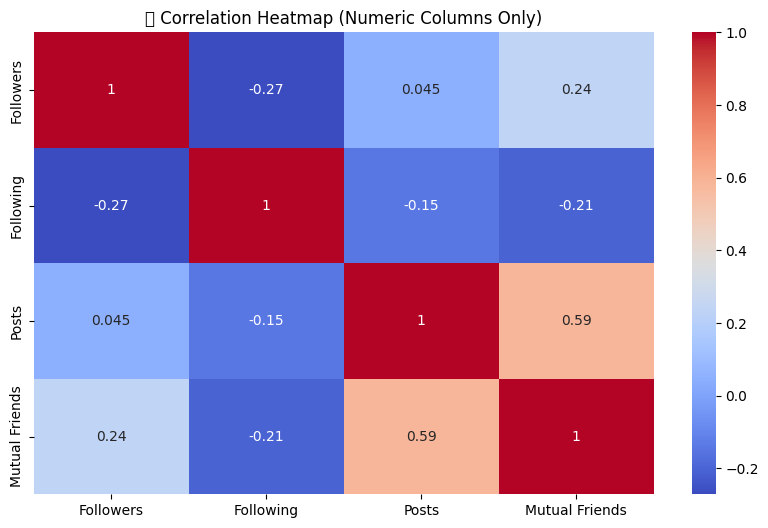

In [31]:
if len(num_cols) >= 2:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
    plt.title("🧪 Correlation Heatmap (Numeric Columns Only)")
    plt.show()
